In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv("./results/mdi_local.two_subgroups_linear_sims/varying_heritability_sample_row_n/seed331/results.csv")

In [29]:
methods = ["MDI_all_stumps", "MDI_sub_stumps", "Permutation", "TreeSHAP", "LIME"]
sample_row_n = df["n"].unique().tolist()
sample_row_n.sort()
heritability = df["heritability"].unique().tolist()
heritability.sort()
nreps = df["rep"].max()
results = {}
for r in range(nreps+1):
    results[r] = {}
    for h in heritability:
        results[r][h] = {}
        for m in methods:
            results[r][h][m] = {}
            results[r][h][m]["auroc_group1"] = []
            results[r][h][m]["auroc_group2"] = []

In [30]:
for r in range(nreps+1):
    for h in heritability:
        for m in methods:
            for s in sample_row_n:
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group2"].unique()) == 1
                assert len(df_sub["rocauc_group1"].unique()) == 1
                results[r][h][m]["auroc_group1"].append(df_sub["rocauc_group1"].unique()[0])
                results[r][h][m]["auroc_group2"].append(df_sub["rocauc_group2"].unique()[0])

In [31]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for m in methods:
        agg_results[h][m] = {}
        agg_results[h][m]["auroc_group1"] = []
        agg_results[h][m]["auroc_group2"] = []

In [32]:
for h in heritability:
    for m in methods:
        for s in sample_row_n:
            agg_group1 = 0
            agg_group2 = 0
            for r in range(nreps+1):
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group2"].unique()) == 1
                assert len(df_sub["rocauc_group1"].unique()) == 1
                agg_group1 += df_sub["rocauc_group1"].unique()[0]
                agg_group2 += df_sub["rocauc_group2"].unique()[0]
            agg_group1 /= (nreps+1)
            agg_group2 /= (nreps+1)
            agg_results[h][m]["auroc_group1"].append(agg_group1)
            agg_results[h][m]["auroc_group2"].append(agg_group2)

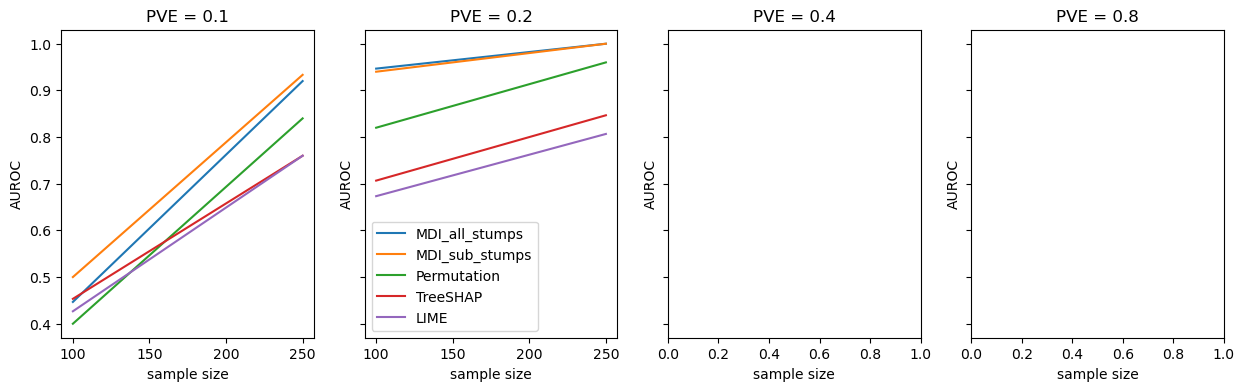

In [36]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1"], label=m)
    
    
# Set labels and title
axs[0].set_xlabel('sample size')
axs[0].set_ylabel('AUROC')
axs[0].set_title('PVE = 0.1')

axs[1].set_xlabel('sample size')
axs[1].set_ylabel('AUROC')
axs[1].set_title('PVE = 0.2')

axs[2].set_xlabel('sample size')
axs[2].set_ylabel('AUROC')
axs[2].set_title('PVE = 0.4')

axs[3].set_xlabel('sample size')
axs[3].set_ylabel('AUROC')
axs[3].set_title('PVE = 0.8')

# Share the label in the last plot
axs[3].legend()

# Show the plots
plt.show()

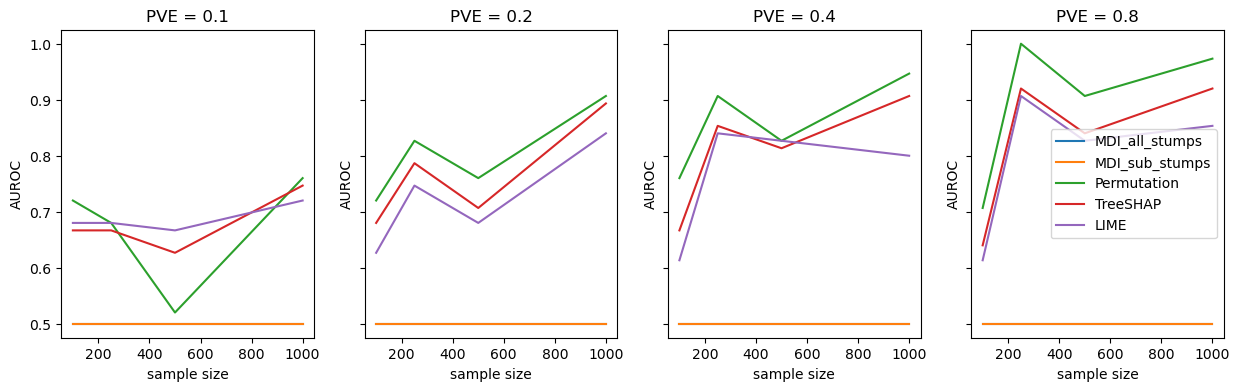

In [12]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        axs[i].plot(sample_row_n, results[h][m]["auroc_group2"], label=m)
    
    
# Set labels and title
axs[0].set_xlabel('sample size')
axs[0].set_ylabel('AUROC')
axs[0].set_title('PVE = 0.1')

axs[1].set_xlabel('sample size')
axs[1].set_ylabel('AUROC')
axs[1].set_title('PVE = 0.2')

axs[2].set_xlabel('sample size')
axs[2].set_ylabel('AUROC')
axs[2].set_title('PVE = 0.4')

axs[3].set_xlabel('sample size')
axs[3].set_ylabel('AUROC')
axs[3].set_title('PVE = 0.8')

# Share the label in the last plot
axs[3].legend()

# Show the plots
plt.show()